#### **7-2. t-test**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

cats=pd.read_csv('https://raw.githubusercontent.com/ADPclass/ADP_book_ver01/main/data/cats.csv')
cats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Sex     144 non-null    object 
 1   Bwt     144 non-null    float64
 2   Hwt     144 non-null    float64
dtypes: float64(2), object(1)
memory usage: 3.5+ KB


In [2]:
import scipy.stats as stats
from scipy.stats import shapiro

mu = 2.6
shapiro(cats['Bwt'])

ShapiroResult(statistic=0.9518791269479144, pvalue=6.730857622701013e-05)

In [3]:
# p-value가 유의수준보다 매우 작으므로 '데이터가 정규분포를 따른다'는 귀무가설을 기각
# 따라서, 일반 t-test가 아닌 wilcoxon test로 t-test 진행

stats.wilcoxon(cats.Bwt - mu, alternative = 'two-sided')
# 일반 t-test는 아래와 같음
# stats.ttest_1samp (cats.Bwt, popmean = mu)

WilcoxonResult(statistic=3573.0, pvalue=0.02524520294814093)

<BarContainer object of 20 artists>

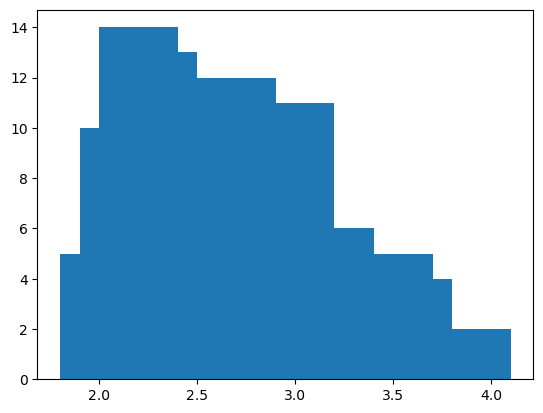

In [4]:
# p-value가 역시 유의수준 (0.05)보다 낮으므로 평균이 2.6이라는 귀무가설 기각 (평균 2.6kg이라 할 수 없다)

import matplotlib.pyplot as plt
cats_Bwt_cnt = cats['Bwt'].value_counts(sort=False)
plt.bar(cats_Bwt_cnt.index,cats_Bwt_cnt.values,width=0.4)

In [5]:
import pandas as pd 
data = pd.DataFrame ({'before':[7,3,4,5,2,1,6,6,5,4],'after':[8,4,5,6,2,3,6,8,6,5]})

# 표본이 정규성을 만족한다는 가정 하에..
stats.ttest_rel (data['after'],data['before'],alternative='greater')

TtestResult(statistic=4.743416490252569, pvalue=0.0005269356285082764, df=9)

In [ ]:
# p-value가 유의수준 (0.05)보다 현저히 낮으므로 수면제 복용 전후 수면시간 차이는 통계적으로 유의하고, 복용 후 수면시간 증가 결론

In [6]:
data.mean()

before    4.3
after     5.3
dtype: float64

In [7]:
# 위 cats DB 활용

female = cats.loc[cats.Sex=='F', 'Bwt']
male = cats.loc[cats.Sex=='M', 'Bwt']
stats.levene (female, male)  # 등분산성 검정

LeveneResult(statistic=19.43101190877999, pvalue=2.0435285255189404e-05)

In [8]:
# 등분산성을 만족하지 않음 (즉, 귀무가설 기각)

stats.ttest_ind (female, male, equal_var = False)

TtestResult(statistic=-8.70948849909559, pvalue=8.831034455859356e-15, df=136.83788299625363)

In [9]:
# 귀무가설을 기각하므로, 수컷/암컷 고양이의 몸무게는 차이가 난다

print(female.mean())
print(male.mean())

2.359574468085107
2.8999999999999995


#### **7-3. ANOVA**

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

iris=pd.read_csv('https://raw.githubusercontent.com/ADPclass/ADP_book_ver01/main/data/iris.csv')
iris.head()

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [11]:
iris['target'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [12]:
iris['target'].value_counts()

target
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [13]:
setosa = iris.loc[iris['target']=='Iris-setosa','sepal width']
versicolor = iris.loc[iris['target']=='Iris-versicolor','sepal width']
virginica = iris.loc[iris['target']=='Iris-virginica','sepal width']

# 텍스트북에서는 아래와 같이 구함
# target_list = iris['target'].unique()
# setosa = iris[iris['target']==target_list[0]]['sepal length']


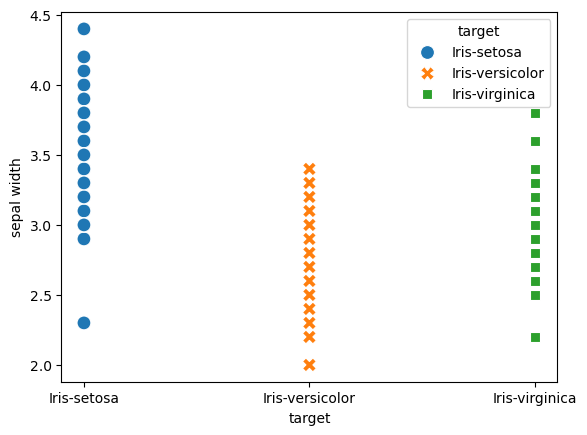

In [14]:
import seaborn as sns

sns.scatterplot (x='target', y='sepal width', data=iris, hue='target', style='target',s=100)
plt.show()

In [15]:
# one-way ANOVA 1번째 단계: 정규성 검정
print(stats.shapiro (setosa))
print(stats.shapiro (versicolor))
print(stats.shapiro (virginica))

ShapiroResult(statistic=0.9686918964570316, pvalue=0.20465666067562632)
ShapiroResult(statistic=0.9741332819702798, pvalue=0.3379951061741378)
ShapiroResult(statistic=0.9673905311257006, pvalue=0.18089604109069918)


In [16]:
# 모두 귀무가설을 기각하지 못했으므로 정규성이 있다고 판단
# one-way ANOVA 2번째 단계: 등분산성 검정

stats.levene (setosa,versicolor,virginica)

LeveneResult(statistic=0.6475222363405327, pvalue=0.5248269975064537)

In [17]:
# 귀무가설을 기각할 수 없기에, 세 집단 간의 동분산성이 있다는 결론. 따라서, one-way ANOVA 실행
# one-way ANOVA 3번째 단계: 분산분석 (ANOVA)

stats.f_oneway (setosa,versicolor,virginica)

F_onewayResult(statistic=47.36446140299382, pvalue=1.3279165184572242e-16)

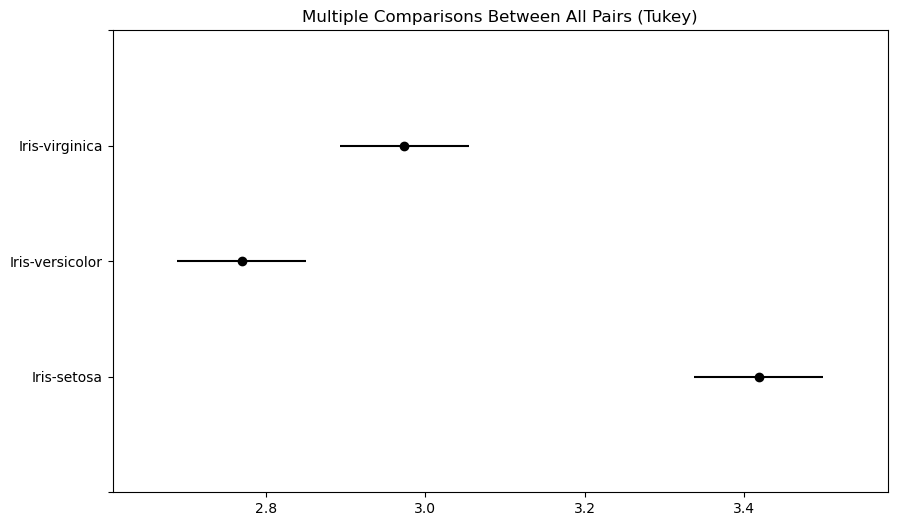

In [19]:
# 귀무가설 기각. 즉, 세 꽃 종류의 sepal width는 통계적으로 유의미한 차이가 있음
# one-way ANOVA 4번째 단계: 사후검정 (어떤 꽃들 사이에 유의미한 차이가 있는지 검정)

#from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison

mc = MultiComparison (data=iris['sepal width'],groups=iris['target'])
tukeyhsd = mc.tukeyhsd(alpha=0.05)
fig = tukeyhsd.plot_simultaneous()


In [22]:
tukeyhsd.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
Iris-setosa,Iris-versicolor,-0.648,0.0,-0.8092,-0.4868,True
Iris-setosa,Iris-virginica,-0.444,0.0,-0.6052,-0.2828,True
Iris-versicolor,Iris-virginica,0.204,0.009,0.0428,0.3652,True


In [23]:
# 두 집단간 평균이 같다는 귀무가설을 모두 기각. 즉, 모든 종들에 대해서 sepal width 평균값은 통계적으로 유의미한 차이
# 만약, 정규성을 만족하지 못 했다면 kruskal 검정 진행

stats.kruskal (setosa,versicolor,virginica)

KruskalResult(statistic=62.49463010053111, pvalue=2.6882119006774528e-14)

In [25]:
# 만약, 등분산성을 만족하지 못 했다면 welch_anova 분석 진행

import pingouin as pg
pg.welch_anova (data=iris, dv ='sepal width', between='target')

,Source,ddof1,ddof2,F,p-unc,np2
0,target,2,97.369597,43.303381,3.519723e-14,0.391881


In [27]:
import pandas as pd
import numpy as np

mtcars=pd.read_csv('https://raw.githubusercontent.com/ADPclass/ADP_book_ver01/main/data/mtcars.csv')
mtcars.head()

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [28]:
cars = mtcars [['mpg','am','cyl']]
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mpg     32 non-null     float64
 1   am      32 non-null     int64  
 2   cyl     32 non-null     int64  
dtypes: float64(1), int64(2)
memory usage: 900.0 bytes


In [29]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

formula = 'mpg ~ C(cyl) + C(am) + C(cyl):C(am)'
model = ols(formula, cars).fit()
aov_table = anova_lm(model, typ=2)
aov_table


,sum_sq,df,F,PR(>F)
C(cyl),456.400921,2.0,24.819011,9.354735e-07
C(am),36.766919,1.0,3.998759,5.608373e-02
C(cyl):C(am),25.436511,2.0,1.383233,2.686140e-01
Residual,239.059167,26.0,NaN,NaN


In [ ]:
# 1. C(cyl):C(am) - 교호작용(interaction) 판단. p-value=0.2686으로 귀무가설 기각하지 못 하므로 교호작용이 존재하지 않기에 아래 주효과 검정 유효
# 2. C(cyl) - p-value가 0.05보다 작아 주효과 검정에서 귀무가설 기각. 즉, 실린더 개수에 따라 주행거리간 유의미한 차이 존재
# 3. C(am) - p-value가 0.05보다 크기에 주효과 검정에서 귀무가설 기각하지 않음. 즉, 변속기 종류에 따라 주행거리간 유의미한 차이 존재하지 않음

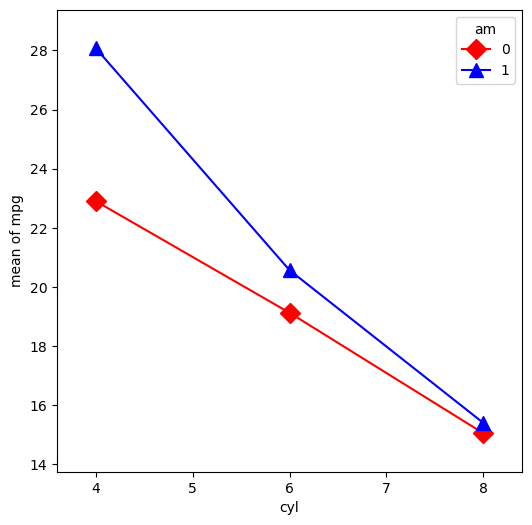

In [37]:
from statsmodels.graphics.factorplots import interaction_plot
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(6,6))
fig = interaction_plot(cars['cyl'],cars['am'],cars['mpg'], colors=['red','blue'], markers=['D','^'], ms=10, ax=ax)
plt.show()

#### **7-4. 교차분석 (카이제곱 검정)**

**(1) 적합성 검정** : 데이터의 빈도분포가 이론적으로 기대하는 분포를 따르는지 검정

In [40]:
import pandas as pd
import numpy as np

df=pd.read_csv('https://raw.githubusercontent.com/ADPclass/ADP_book_ver01/main/data/titanic.csv')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   adult_male   891 non-null    bool   
 10  embark_town  889 non-null    object 
dtypes: bool(1), float64(2), int64(4), object(4)
memory usage: 70.6+ KB


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,adult_male,embark_town
0,0,3,male,22.0,1,0,7.2500,S,Third,True,Southampton
1,1,1,female,38.0,1,0,71.2833,C,First,False,Cherbourg
2,1,3,female,26.0,0,0,7.9250,S,Third,False,Southampton
3,1,1,female,35.0,1,0,53.1000,S,First,False,Southampton
4,0,3,male,35.0,0,0,8.0500,S,Third,True,Southampton


In [46]:
df_t = df[df['survived']==1]
table = df_t['sex'].value_counts()
print(table)
print(table.sum())

sex
female    233
male      109
Name: count, dtype: int64
342


In [43]:
from scipy.stats import chisquare
chi = chisquare(table, f_exp=[171,171])
chi

Power_divergenceResult(statistic=44.95906432748538, pvalue=2.0119672574477235e-11)

In [ ]:
# p-value가 유의수준(0.05)보다 낮아 귀무가설 기각. 즉, 타이타닉 생존자 남녀비중은 5:5라고 할 수 없음

**(2) 독립성 검정** : 모집단이 두 개의 변수 A ,B에 의해 범주화 되었을 때, 두 변수들 사의 관계가 독립인지 아닌지 검정

In [47]:
# 타이타닉 데이터에서 좌석등급과 생존여부가 서로 독립인지 판별

table2 = pd.crosstab (df['class'],df['survived'])
table2

survived,0,1
class,,
First,80,136
Second,97,87
Third,372,119


In [57]:
from scipy.stats import chi2_contingency
chi, p, df, expect = chi2_contingency(table2)
print('statistics:',chi)
print('p-value:',p)
print('df:',df)
print('expected: \n',expect)

#아래처럼 출력 가능
#test = chi2_contingency(table2)
#print(test.pvalue)

statistics: 102.88898875696056
p-value: 4.549251711298793e-23
df: 2
expected: 
 [[133.09090909  82.90909091]
 [113.37373737  70.62626263]
 [302.53535354 188.46464646]]


In [ ]:
# 귀무가설 기각. 즉, 좌석등급과 생존은 유의수준 0.05하에서 독립이 아님

**(3) 동질성 검정** : 모집단이 임의의 변수에 따라 R개의 속성으로 범주화 되었을 때,   
                      R개의 부분 모집단에서 추출한 표본이 C개의 범주화된 집단의 분포가 서로 동일한지를 검정

독립성 검정과 계산법이 같고, 귀무가설만 다르다.
H0: class의 분포는 survived에 관계없이 동일하다.
H0: class의 분포는 survived에 관계없이 동일하지 않다.